# 第一题

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the earthquake data
data = pd.read_csv('C:\\Users\\Administrator\\.anaconda\\usgs_earthquakes.csv')
print(data.head())

                      time   latitude  longitude  depth   mag magType  nst  \
0  2014-01-31 23:53:37.000  60.252000  -152.7081  90.20  1.10      ml  NaN   
1  2014-01-31 23:48:35.452  37.070300  -115.1309   0.00  1.33      ml  4.0   
2  2014-01-31 23:47:24.000  64.671700  -149.2528   7.10  1.30      ml  NaN   
3  2014-01-31 23:30:54.000  63.188700  -148.9575  96.50  0.80      ml  NaN   
4  2014-01-31 23:30:52.210  32.616833  -115.6925  10.59  1.34      ml  6.0   

      gap     dmin     rms net          id                   updated  \
0     NaN      NaN  0.2900  ak  ak11155107  2014-02-05T19:34:41.515Z   
1  171.43  0.34200  0.0247  nn  nn00436847  2014-02-01T01:35:09.000Z   
2     NaN      NaN  1.0000  ak  ak11151142  2014-02-01T00:03:53.010Z   
3     NaN      NaN  1.0700  ak  ak11151135  2014-01-31T23:41:25.007Z   
4  285.00  0.04321  0.2000  ci  ci37171541  2014-02-01T00:13:20.107Z   

                               place        type  
0  26km S of Redoubt Volcano, Alaska  earthquak

In [3]:
print(data.columns.tolist())


['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type']


In [4]:
data['time'] = pd.to_datetime(data['time'])

In [5]:
data_2014 = data[data['time'].dt.year == 2014]

In [6]:
top_50_earthquakes = data_2014.nlargest(50, 'mag')

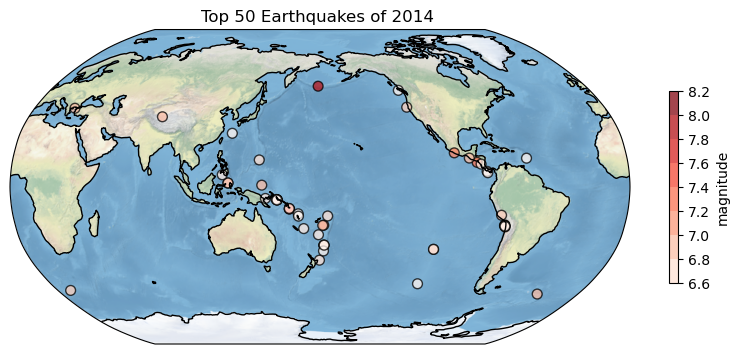

In [17]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.set_global()
ax.stock_img()
ax.coastlines()
scatter = ax.scatter(top_50_earthquakes['longitude'], top_50_earthquakes['latitude'],
                     transform=ccrs.PlateCarree(), 
                     s=50,  
                     c=top_50_earthquakes['mag'], cmap='Reds', alpha=0.75, edgecolors='k')

cbar = plt.colorbar(scatter, shrink=0.5, boundaries=np.linspace(6.6, 8.2, 9))
cbar.set_label('magnitude')

ax.set_global()


plt.title('Top 50 Earthquakes of 2014 ')


plt.show()

# 第二题

In [6]:
import pandas as pd
import numpy as np 
import netCDF4
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [7]:
data = xr.open_dataset(r"C:\Users\Administrator\.anaconda\CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
data

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

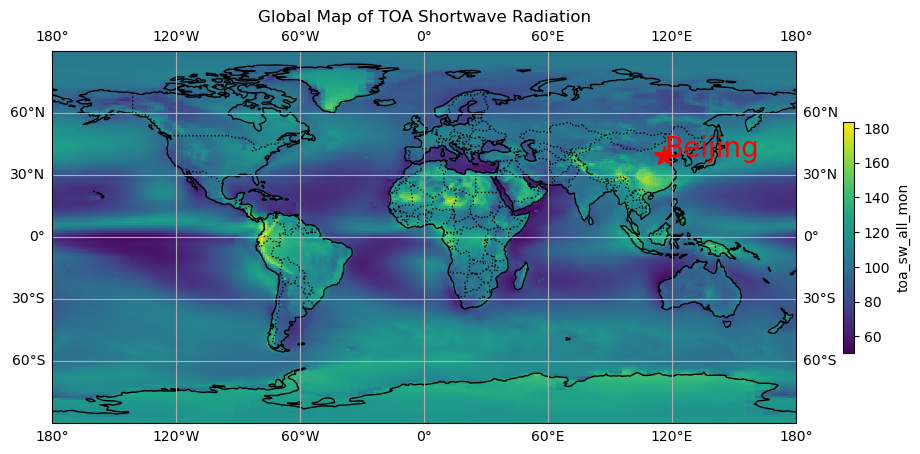

In [8]:

variable = data['toa_sw_all_mon']

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = variable.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.gridlines(draw_labels=True)
ax.set_title('Global Map of TOA Shortwave Radiation')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.text(116, 39, 'Beijing', size='20',transform=ccrs.PlateCarree(), color='red')
ax.plot(116, 39, marker='*', color='red', markersize=15, transform=ccrs.PlateCarree()) 
plt.show()

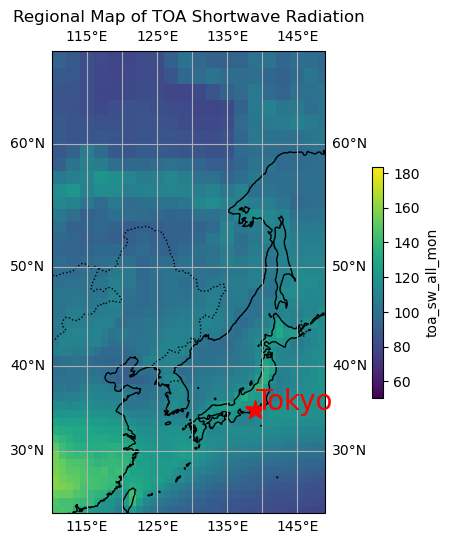

In [100]:
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.Mercator())  # Different projection
im = variable.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})


ax.set_extent([110, 149, 22, 66], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.gridlines(draw_labels=True)
ax.set_title('Regional Map of TOA Shortwave Radiation')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.text(139, 35, 'Tokyo',  size='20',transform=ccrs.PlateCarree(),color='red')
ax.plot(139, 35, marker='*', color='red', markersize=15, transform=ccrs.PlateCarree()) 
plt.show()
